In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [107]:
pd.set_option('display.max_rows', 300)

In [108]:
lqi = pd.read_csv("d:/Dane/OECD_life_quality_index_BLI_07012024155608989.csv")

In [109]:
lqi["Indicator"].unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [110]:
def get_indicator_subset(lqi, indicator_name):
    flt = lqi[lqi["Indicator"] == indicator_name].copy()
    flt["Value_num"] = pd.to_numeric(flt["Value"])
    flt[indicator_name] = flt["Value_num"]
    flt = flt[["Country", indicator_name]]
    res = flt.copy()
    return res

In [111]:
life_sat = get_indicator_subset(lqi, "Life satisfaction")

In [112]:
leisure_time = get_indicator_subset(lqi, "Time devoted to leisure and personal care")

In [113]:
net_wealth = get_indicator_subset(lqi, "Household net wealth")

In [114]:
merged = pd.merge(life_sat, net_wealth, on = "Country")

In [115]:
x = merged["Household net wealth"]
y = merged["Life satisfaction"]

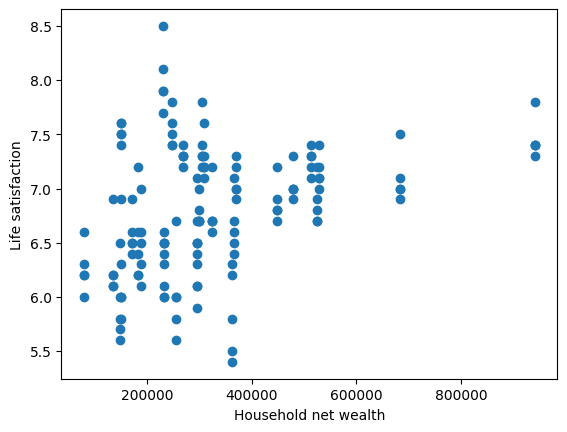

In [116]:
plt.xlabel("Household net wealth")
plt.ylabel("Life satisfaction")
plt.scatter(x, y)

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [124]:
model = LinearRegression()

In [125]:
xx = x.values.reshape(-1, 1)

In [126]:
res = model.fit(xx, y)

Coefficients: 
 [1.16150844e-06]
Mean squared error: 0.30
Coefficient of determination: 0.13


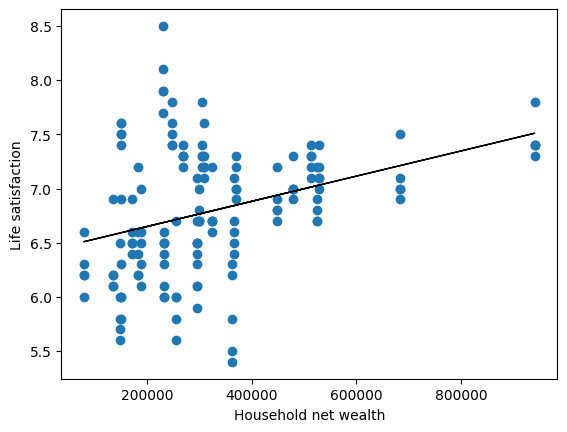

In [130]:
y_pred = model.predict(xx)

print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

plt.xlabel("Household net wealth")
plt.ylabel("Life satisfaction")
plt.scatter(x, y)
plt.plot(x, y_pred, color = "black", linewidth = 1)
plt.show()